## Qiskit Assignment
* Submitted by - Amey Rodge and Bashar Karaja (QuanTEEM M1)


## Qiskit Session 2  - First Quantum Algorithms

---



In this last practical session you will run on quantum machine your first quantum algorithms by implementing the algorithms seen in class.

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/quantum_computer.jpeg'  width="300px" />    
    </tr>
</table>


---
## Get ready
As usual one first  import Qiskit and the vizualisation tools
```Python
from qiskit import*
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
```
And as well we load the simulator and the IBM account:

```Python
simulator=Aer.get_backend('qasm_simulator')
IBMQ.load_account()
provider=IBMQ.get_provider('ibm-q')
qcomputer=provider.get_backend('ibm_brisbane')
from qiskit.tools.monitor import job_monitor

```
   

In [1]:
from qiskit import*
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
simulator=Aer.get_backend('qasm_simulator')
IBMQ.save_account('2ca4e626b06434d8c412cfaa81a774cf1e19fd33e55a90efece4869e0d3b96a47bb530a334f9c0c1a9939bd56378533d35fffab3130dfc86dcf20bea2efac990')
IBMQ.load_account()
provider=IBMQ.get_provider('ibm-q')
qcomputer=provider.get_backend('ibm_brisbane')
from qiskit.tools.monitor import job_monitor

/var/folders/jy/bzqpqm_s0h95q19p_32y_4g80000gn/T/ipykernel_40106/603959491.py:5: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account('2ca4e626b06434d8c412cfaa81a774cf1e19fd33e55a90efece4869e0d3b96a47bb530a334f9c0c1a9939bd56378533d35fffab3130dfc86dcf20bea2efac990')
/var/folders/jy/bzqpqm_s0h95q19p_32y_4g80000gn/T/ipykernel_40106/603959491.py:5: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qi

### Create an oracle

We have seen in class that it is always possible to implement a classical function with a quantum computer. Here we are going to implement classical functions usefull to run the Deutsh and Deutsch-Josza algorithm.

Consider the following circuit:

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/deutsch_balanced1.svg'  width="300px" />    
    </tr>
</table>

Implement this circuit and check that it corresponds to a unitary gate $U_f$ such that $U_f|x_0x_2x_3>|y>=|x_0x_1x_2>|y\oplus f(x_0,x_1,x_2)>$ where $f$ is a boolean function that satisfies:


|$f(x_0,x_1,x_2)=0$| $f(x_0,x_1,x_2)=1$|
|---|---|
|$000$ |$111$|
|$011$ |$100$|
|$101$ |$010$|
|$110$ |$001$|

/Users/ameyrodge/anaconda3/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


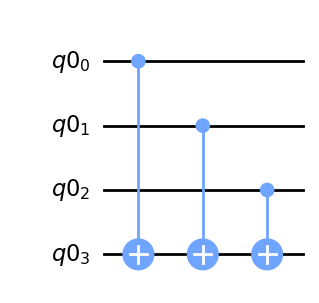

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
q=QuantumRegister(4)
qc=QuantumCircuit(q)
qc.cx(q[0],q[3])
qc.cx(q[1],q[3])
qc.cx(q[2],q[3])
qc.draw('mpl')

Modify the previous circuit to create an other oracle $U_f$ that is defined by

|$f(x_0,x_1,x_2)=0$| $f(x_0,x_1,x_2)=1$|
|---|---|
|$010$ |$101$|
|$011$ |$100$|
|$111$ |$000$|
|$110$ |$001$|

What would be an oracle for a constant function $f(x_0,\dots,x_n)=k$ with $k\in\{0,1\}$ ?

In [4]:
import random
def oracle():
    type = random.choice(["constant", "balanced"])
    result = QuantumCircuit(2)
    result.barrier()
    
    if type == "constant":
        # ignore the input and randomly add a not gate
        if random.randrange(2) == 0:
            result.x(1)
    elif type == "balanced":
        # making sure the output is balanced
        result.cx(0, 1)
        # and randomly inverting it
        if random.randrange(2) == 0:
            result.x(1)
    
    result.barrier()
    return result
oracle_circuit =oracle()

## Deutsch-Josza

Recall the circuit of the Deutsch-Josza algorithm that generalizes Deutsch algorithm

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/deutsch_steps.png'  width="400px" />    
    </tr>
</table>

Define a constant oracle $U_{f_1}$ and a balanced oracle $U_{f_2}$ of your choice and check on your example the validity of Deutsch-Josza's algorithm.

non-zero string ---> balanced function
zero string -------> costatant function

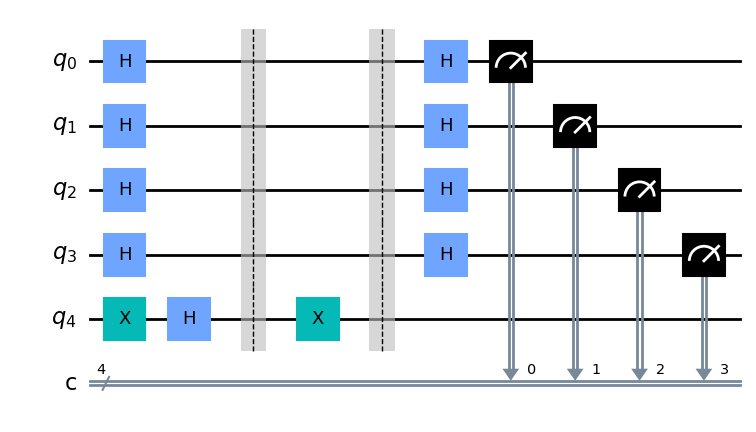

In [5]:
# Building oracle for Deutch-Josza algorithm
def oraclej(n):
    result = QuantumCircuit(n+1)
    result.barrier()
    
    type = random.choice(["constant", "balanced"])
    if type == "constant":
        # ignore the input and randomly add a not gate
        if random.randrange(2) == 0:
            result.x(n)
    else:
        # we can add cnot to the circuit to have a balanced function
        control = random.randrange(n)
        result.cx(control, n)
        # randomly invert the result
        if random.randrange(2) == 0:
            result.x(n)
    
    result.barrier()
    return result

from qiskit import QuantumCircuit, execute, Aer
dj_circuit=QuantumCircuit(5,4)
dj_circuit.x(4)
dj_circuit.h(range(5))
dj_circuit.compose(oraclej(4),inplace=True)
dj_circuit.h(range(4))
dj_circuit.measure(range(4),range(4))
dj_circuit.draw('mpl')

In [6]:
job = execute(dj_circuit, Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts()
print(counts)

{'0000': 10000}


## Bernstein-Vazirani

Bernstein-Vazirani algorithm is an algorithm that solve the following problem:
Let $u=u_{n-1}\dots u_0\in \{0,1\}^n$ an unknown $n$-bits string. Suppose you have a classical function $f:\{0,1\}^n\to \{0,1\}$ which calculates $f_u(x)=x.u [2]$ where $x.u$ is the usual inner product between $n$-bits strings, i.e. $x=x_{n-1}\dots x_0$ and $$x.u=x_0u_0+x_1u_1+\dots+x_{n-1}u_{n-1}$$

The goal of Bernstein-Vazirani's algorithm is to find $u$.

Recall that classically you can find $u$ by testing $n$ values $x\in \{0,1\}^n$. Bernstein-Vazirani's algorithm solves the problem by using only once the function $f$.

### Implementing the function $f_u$

Show that the following circuit implements on the function $f_u$ with $u=1101$.

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/vaziraniu.png'  width="330px" />    
    </tr>
</table>

Implement a circuit that corresponds to the function $f_u$ with $u=1010101$.


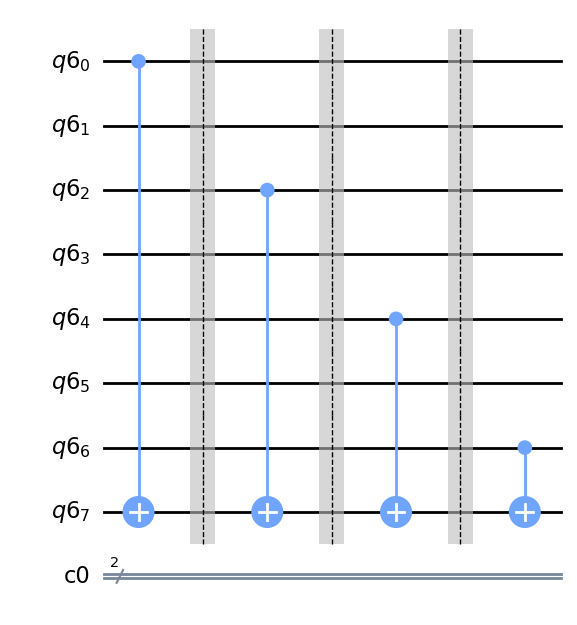

In [7]:
q=QuantumRegister(8)
c=ClassicalRegister(2)
qc=QuantumCircuit(q,c)
qc.cx(q[0],q[7])
qc.barrier()
qc.cx(q[2],q[7])
qc.barrier()
qc.cx(q[4],q[7])
qc.barrier()
qc.cx(q[6],q[7])
qc.draw('mpl')


Write a Python function that given $u=u_{n-1}\dots u_0$ will creates the Quantum Circuit implementing the gate $U_{f_u}$. 

You can use define $u$ as a sting $u='u_{n-1}\dots u_0'$ and use the Python command: 
```Python 
enumerate
```

### Bernstein-Vazirani Circuit

Here is the circuit of Benrstein-Vazirani's algorithm that allows you to find $u$ by only computing once the function $f_u$.

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/vazirani.png'  width="330px" />    
    </tr>
</table>


Implement Bernstein-Vazirani's algorithm such as, the function $f_u$ is defined by the choice of $u=u_{n-1}\dots u_0$ made by the user and the circuit and measurementsof the circuit are automatically created from the knowledge of $u$.

Test your algorithm on the simulator.

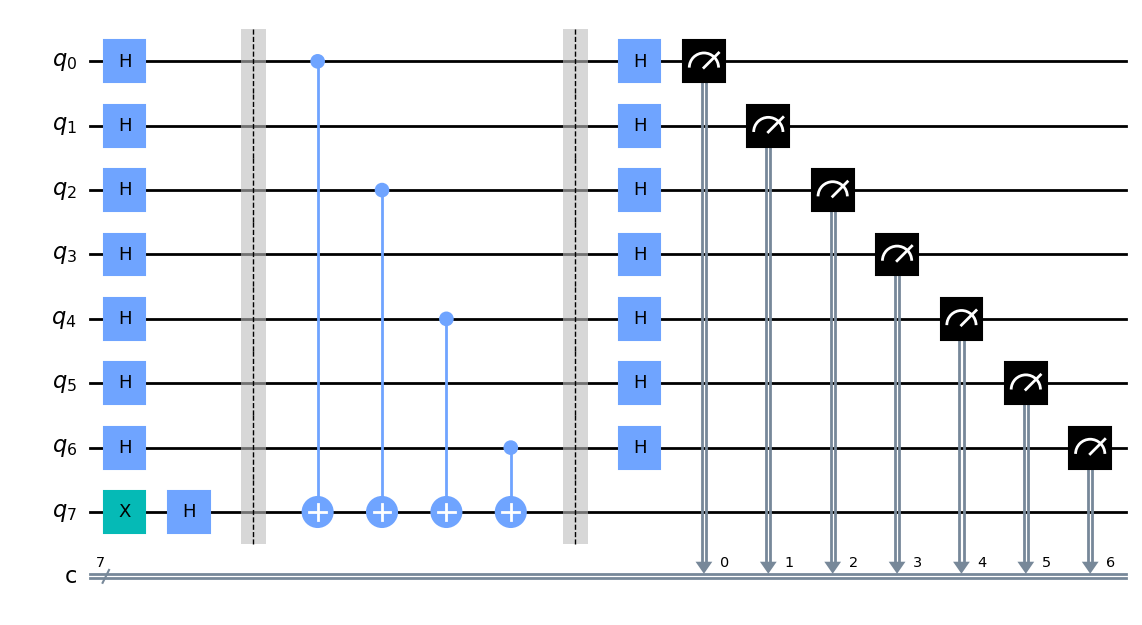

In [8]:
def bv_oracle():
    u="1010101"
    n = len(u)
    u = u[::-1] # we revert the string since u_0 is at the left according to python 
    # and in the right according to qiskit
    
    circuit = QuantumCircuit(n+1)
    circuit.barrier()
    
    for i in range(n):
        if u[i] == '1':
            circuit.cx(i, n)
    
    circuit.barrier()
    return circuit
from qiskit import QuantumCircuit, execute, Aer

n=7  
bv_circuit = QuantumCircuit(n+1, n)
#Apply X gate to last qubit
bv_circuit.x(n)
#Apply Hadamard to all qubits
bv_circuit.h(range(n+1))
#Apply oracle
bv_circuit.compose(bv_oracle(), inplace=True)
#Apply Hadamard to all qubits
bv_circuit.h(range(n))
bv_circuit.measure(range(n), range(n))
#Draw the circuit
bv_circuit.draw(output="mpl")


In [9]:
job = execute(bv_circuit, Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts()
for outcome in counts:
    reverse_outcome = ''
    for i in outcome:
        reverse_outcome = i + reverse_outcome
    print(reverse_outcome,"is observed",counts[outcome],"times")

1010101 is observed 10000 times


Test your code on a real quantum device.

In [10]:
#from qiskit import IBMQ
#IBMQ.save_account('2ca4e626b06434d8c412cfaa81a774cf1e19fd33e55a90efece4869e0d3b96a47bb530a334f9c0c1a9939bd56378533d35fffab3130dfc86dcf20bea2efac990')
#IBMQ.load_account()
#provider=IBMQ.get_provider('ibm-q')
#qcomputer=provider.get_backend('ibm_brisbane')
#job=execute(bv_circuit,backend=qcomputer)
#from qiskit.tools.monitor import job_monitor
#job_monitor(job)

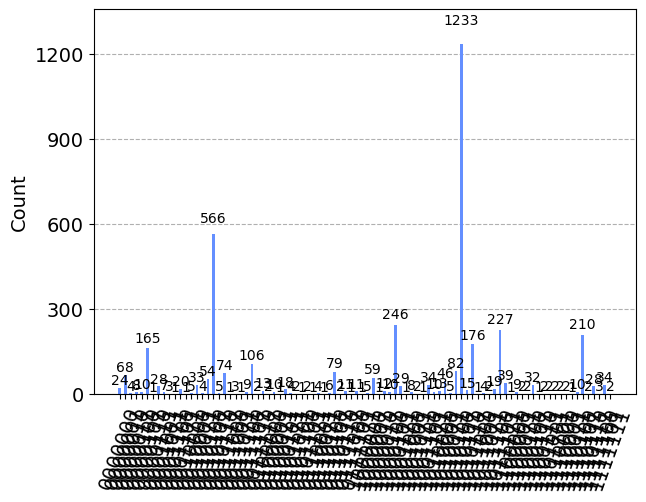

In [11]:
job= provider.backend.retrieve_job('cpy13sqd2f40008726c0')
result=job.result()
plot_histogram(result.get_counts(bv_circuit))

## Grover's algorithm

Grover's algorithm is based on two gates, the oracle and the diffusion gate.
We will implement Grover's algorithm for a three-qubit system.


### The oracle

Consider the following circuit:


<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/oracle_3qbt.png'  width="330px" />    
    </tr>
</table>

Check that this oracle signs the element $|111>$.
How can you modify if so it signs the element $|101>$ ?

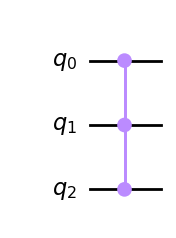

In [12]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np


# define the Oracle circuit
oracle=QuantumCircuit(3,name='Oracle')
# to marrk the |111> state we can use a ccZ gate:
#oracle.h(2)
oracle.ccz(0,1,2)
#oracle.h(2)
oracle.draw('mpl')


In [13]:
## check if the oracle is working:
#IBMQ.save_account('320833fdbdd2d07f3d2b3dc4c7e34fdf5e87e6b155f16096d276fafb4bfa15c7216c13595a25dfa7d75d9350e04e096d004e76f50c29028062c9612e21e19140')
#IBMQ.load_account()
#provider=IBMQ.get_provider('ibm-q')
#qcomputer=provider.get_backend('ibm_osaka')

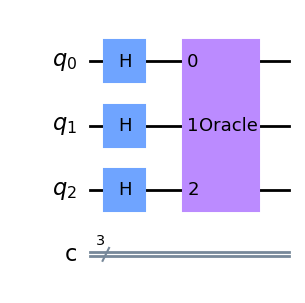

In [14]:
backend=Aer.get_backend('statevector_simulator')
grover_circuit=QuantumCircuit(3,3)
grover_circuit.h([0,1,2])
grover_circuit.append(oracle,[0,1,2])
grover_circuit.draw('mpl')

In [15]:
job=execute(grover_circuit,backend)
result=job.result()

sv= result.get_statevector()
np.around(sv,2)

# notice that this ciruit give the last state |111> as -|111> , which is what the oracle do


array([ 0.35+0.j,  0.35+0.j,  0.35+0.j,  0.35-0.j,  0.35+0.j,  0.35+0.j,
        0.35+0.j, -0.35+0.j])

In [16]:
# to make the oracle sign the stae |101> instead of |111>, we can add a ccx gate as follows:
# define the Oracle circuit

oracle=QuantumCircuit(3,name='Oracle')
# to marrk the |111> state we can use a ccZ gate:
#oracle.h(2)
oracle.ccz(0,1,2)
oracle.ccx(0,2,1)
#oracle.h(2)
oracle.draw('mpl')

backend=Aer.get_backend('statevector_simulator')
grover_circuit=QuantumCircuit(3,3)
grover_circuit.h([0,1,2])
grover_circuit.append(oracle,[0,1,2])
grover_circuit.draw('mpl')
job=execute(grover_circuit,backend)
result=job.result()

sv= result.get_statevector()
np.around(sv,2)

# notice that this ciruit give the last state |101> as -|101>


array([ 0.35+0.j,  0.35+0.j,  0.35+0.j,  0.35-0.j,  0.35+0.j, -0.35+0.j,
        0.35+0.j,  0.35+0.j])

### Implement Grover algorithm

Based on the previous question, implement grover's algorithm for $x_0=|101>$ and run it on the simulator and the IBM Quantum Experience

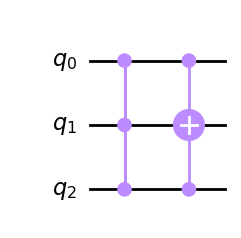

In [17]:

# define the Oracle circuit
oracle=QuantumCircuit(3,name='Oracle')
# to marrk the |111> state we can use a ccZ gate:

oracle.ccz(0,1,2)
oracle.ccx(0,2,1) # to mark |101>
oracle.draw('mpl')


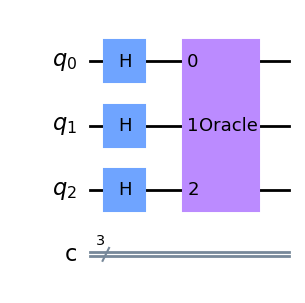

In [18]:

backend=Aer.get_backend('statevector_simulator')
grover_circuit=QuantumCircuit(3,3)
grover_circuit.h([0,1,2])
grover_circuit.append(oracle,[0,1,2])
grover_circuit.draw('mpl')


In [19]:
job=execute(grover_circuit,backend)
result=job.result()

sv= result.get_statevector()


# amplitude amplification:
reflection = QuantumCircuit(3,name='reflection')
reflection.h([0,1,2])
reflection.x([0,1,2])
reflection.ccz(0,1,2)
reflection.h([0,1,2])
reflection.to_gate()

reflection.draw('mpl')

backend=Aer.get_backend('qasm_simulator')
grover_circuit=QuantumCircuit(3,3)
grover_circuit.h([0,1,2])
grover_circuit.append(oracle,[0,1,2])
grover_circuit.append(reflection,[0,1,2])
grover_circuit.measure([0,1,2],[0,1,2])
grover_circuit.draw('mpl')

job=execute(grover_circuit,backend,shot=1)
result=job.result()
result.get_counts()

{'110': 29,
 '001': 28,
 '100': 22,
 '000': 41,
 '010': 30,
 '111': 33,
 '011': 26,
 '101': 815}

In [20]:
#from qiskit import IBMQ
#IBMQ.save_account('2ca4e626b06434d8c412cfaa81a774cf1e19fd33e55a90efece4869e0d3b96a47bb530a334f9c0c1a9939bd56378533d35fffab3130dfc86dcf20bea2efac990')
#IBMQ.load_account()
#provider=IBMQ.get_provider('ibm-q')
#qcomputer=provider.get_backend('ibm_brisbane')
#job=execute(grover_circuit,backend=qcomputer)
#from qiskit.tools.monitor import job_monitor
#job_monitor(job)

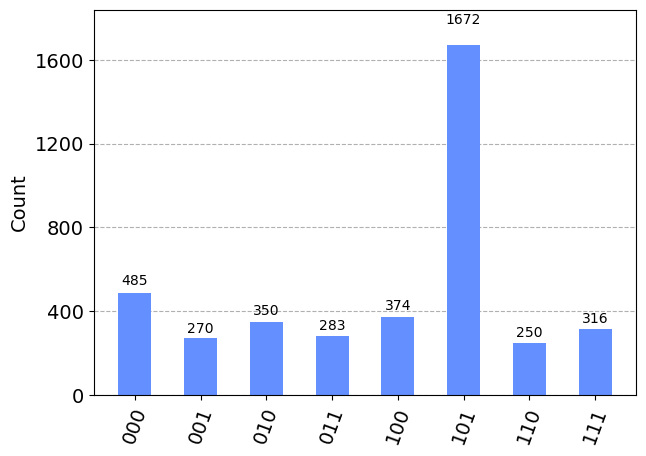

In [22]:
job= provider.backend.retrieve_job('cpynfvzsrbv0008gch4g')
result=job.result()
plot_histogram(result.get_counts(grover_circuit))

## Exercises

### Exercise 1

Write a Qiksit Script that implement Grover's algorithm for a given 3 qubit states $|x_2x_1x_0>$.

### Exercise 2

How would you implement Grover's algorithm for 4 qubits ?


In [23]:
# excerice 1:

from qiskit import *
import matplotlib.pyplot as plt
import numpy as np

# this function will be used as an oracle that we can call to marke the desired state we want for 3 qbits states
# it takes two arguments: the oracle initialized and the state we want to mark
# the output of the function will return back an oracle that marke the specified state.
def oracle_3q(oracle, state):
    q0=state[0]
    q1=state[1]
    q2=state[2]
    if q0==1  :
        if q1==1:
            if q2==1:
                oracle.ccz(0,1,2) # |111>
            else:# q2=0:
                oracle.ccz(0,1,2)
                oracle.ccx(1,2,0)
                                  # |110>
        else: #q1=0
            if q2==1:
                oracle.ccz(0,1,2)
                oracle.ccx(0,2,1) # |101>
            else: # q2=0
                oracle.ccz(0,1,2)
                oracle.ccx(1,2,0)
                oracle.x(1)       # 100
    else:
        if q1==1:
            if q2==1: # 011
                oracle.ccz(0,1,2)
                oracle.cx(0,2)
                oracle.ccx(1,2,0) 

                
            else: #010
                oracle.ccz(0,1,2)
                oracle.cx(0,1)
                oracle.x([0,2])
                oracle.x(1)
        else:
            if q2==1: # 001
                oracle.ccz(0,1,2)
                oracle.cx(0,1)
                oracle.cx(0,2)
                
            else: #000
                oracle.ccz(0,1,2)
                oracle.cx(0,1)
                oracle.x([0,2])
                
    return oracle

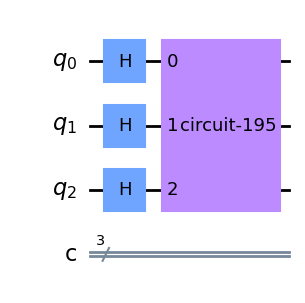

In [24]:
state=[1,0,0] #define the desired state to be marked

backend=Aer.get_backend('statevector_simulator') # create the backend
grover_circuit=QuantumCircuit(3,3) # initialize the grovers cicuit
grover_circuit.h([0,1,2])
g_orac=QuantumCircuit(3) # initialize the oracle
oracle=oracle_3q(g_orac,state) # call the oracle function to mark the state
grover_circuit.append(oracle,[0,1,2]) # append it to the grovers circuit
grover_circuit.draw('mpl')




In [25]:
job=execute(grover_circuit,backend) 
result=job.result() # to get results

In [26]:
sv= result.get_statevector() # get the vector states of each state
np.around(sv,2) # rounding the vector states

# notice that this ciruit give the last state |111> as -|111> , which is what the oracle do

array([ 0.35+0.j,  0.35-0.j,  0.35+0.j,  0.35+0.j, -0.35+0.j,  0.35+0.j,
        0.35+0.j,  0.35+0.j])

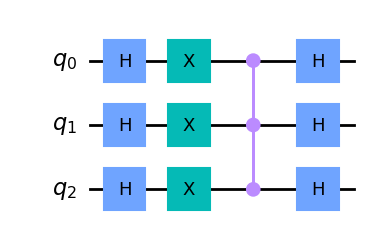

In [27]:
# amplitude amplification:
reflection = QuantumCircuit(3,name='reflection') 
reflection.h([0,1,2])
reflection.x([0,1,2])
reflection.ccz(0,1,2)
reflection.h([0,1,2])
reflection.to_gate()
reflection.draw('mpl')

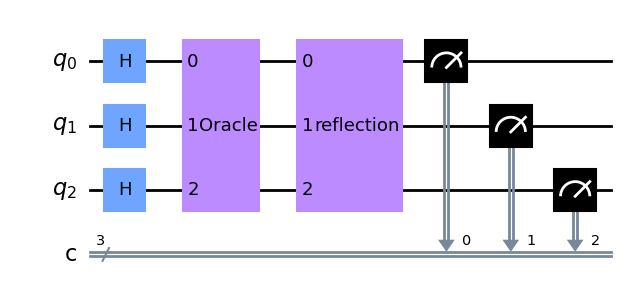

In [28]:
backend=Aer.get_backend('qasm_simulator')
grover_circuit=QuantumCircuit(3,3)
grover_circuit.h([0,1,2])
g_orac=QuantumCircuit(3,name='Oracle')
oracle=oracle_3q(g_orac,state)
grover_circuit.append(oracle,[0,1,2])
grover_circuit.append(reflection,[0,1,2])
grover_circuit.measure([0,1,2],[0,1,2])
grover_circuit.draw('mpl')

In [29]:
job=execute(grover_circuit,backend,shot=1)
result=job.result()
result.get_counts()

{'000': 32,
 '010': 34,
 '100': 792,
 '001': 28,
 '110': 33,
 '111': 37,
 '011': 29,
 '101': 39}

### 4-Qubit case

In [30]:
# this function will be used as an oracle that we can call to marke the desired state we want for 4 qbits states
# it takes two arguments: the oracle initialized and the state we want to mark
# the output of the function will return back an oracle that marke the specified state.

def oracle_4q(oracle,state):
    q0=state[0]
    q1=state[1]
    q2=state[2]
    q3=state[3]
    if q0==1:
        if q1==1:
            if q2==1:
                if q3==1: #1111
                    
                    oracle.h(3)  # H on target qubit
                    oracle.mcx([0, 1, 2], 3, mode='noancilla')
                    oracle.h(3)  # again H on target qubit
                    
                    
                else:     #1110
                    
                    oracle.h(3)  # H on target qubit
                    oracle.mcx([0, 1, 2], 3, mode='noancilla')
                    oracle.h(3)  # again H on target qubit
                    oracle.barrier()
                    oracle.x(0)


                    
            
            else:
                if q3==1: #1101
                    oracle.h(3)  # H on target qubit
                    oracle.mcx([0, 1, 2], 3, mode='noancilla')
                    oracle.h(3)  # again H on target qubit
                    oracle.x(1)
                    
                else:     #1100
                    oracle.h(3)  # H on target qubit
                    oracle.mcx([0, 1, 2], 3, mode='noancilla')
                    oracle.h(3)  # again H on target qubit
                    oracle.x(0)
                    oracle.x(1)
            
            
        else:
            if q2==1: 
                if q3==1: #1011
                    
                    oracle.h(3)  # H on target qubit
                    oracle.mcx([0, 1, 2], 3, mode='noancilla')
                    oracle.h(3)  # again H on target qubit
                    oracle.x(2)
                
                else:     # 1010
                    oracle.h(3)  # H on target qubit
                    oracle.mcx([0, 1, 2], 3, mode='noancilla')
                    oracle.h(3)  # again H on target qubit
                    oracle.x(0)
                    oracle.x(2)
            else:     
                if q3==1: # 1001
                    oracle.h(3)  # H on target qubit
                    oracle.mcx([0, 1, 2], 3, mode='noancilla')
                    oracle.h(3)  # again H on target qubit
                    oracle.x(2)
                    oracle.x(1)
                
                else:     #1000
                    oracle.h(3)  # H on target qubit
                    oracle.mcx([0, 1, 2], 3, mode='noancilla')
                    oracle.h(3)  # again H on target qubit
                    oracle.x(0)
                    oracle.x(1)
                    oracle.x(2)
    
    else:
        if q1==1:
            if q2==1:
                if q3==1: #0111
                    oracle.h(3)  # H on target qubit
                    oracle.mcx([0, 1, 2], 3, mode='noancilla')
                    oracle.h(3)  # again H on target qubit
                    oracle.x(3)
                    
                else:     #0110
                    oracle.h(3)  # H on target qubit
                    oracle.mcx([0, 1, 2], 3, mode='noancilla')
                    oracle.h(3)  # again H on target qubit
                    oracle.x(0)
                    oracle.x(3)
            else:
                if q3==1: #0101
                    oracle.h(3)  # H on target qubit
                    oracle.mcx([0, 1, 2], 3, mode='noancilla')
                    oracle.h(3)  # again H on target qubit
                    oracle.x(3)
                    oracle.x(1)
                    
                else:     #0100
                    oracle.h(3)  # H on target qubit
                    oracle.mcx([0, 1, 2], 3, mode='noancilla')
                    oracle.h(3)  # again H on target qubit
                    oracle.x(3)
                    oracle.x(0)
                    oracle.x(1)
        else:
            if q2==1: 
                if q3==1:  #0011
                    oracle.h(3)  # H on target qubit
                    oracle.mcx([0, 1, 2], 3, mode='noancilla')
                    oracle.h(3)  # again H on target qubit
                    oracle.x(2)
                    oracle.x(3)
                    
                else:     #0010
                    job=execute(grover_circuit,backend,shot=1)
                    result=job.result()
                    result.get_counts()
            else:    
                if q3==1: #0001
                    oracle.h(3)  # H on target qubit
                    oracle.mcx([0, 1, 2], 3, mode='noancilla')
                    oracle.h(3)  # again H on target qubit
                    oracle.x(2)
                    oracle.x(1)
                    oracle.x(3)
                    
                else:     #0000
                    oracle.h(3)  # H on target qubit
                    oracle.mcx([0, 1, 2], 3, mode='noancilla')
                    oracle.h(3)  # again H on target qubit
                    oracle.x(2)
                    oracle.x(3)
                    oracle.x(0)
                    oracle.x(1)
    return oracle

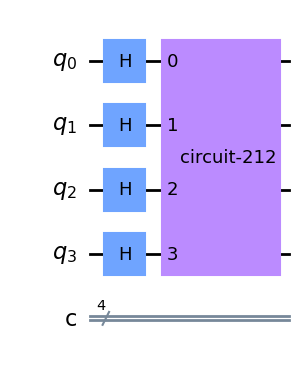

In [31]:
state=[1,0,1,0] #define the desired state to be marked

backend=Aer.get_backend('statevector_simulator') # create the backend
grover_circuit=QuantumCircuit(4,4) # initialize the grovers cicuit
grover_circuit.h([0,1,2,3])
g_orac=QuantumCircuit(4) # initialize the oracle
oracle=oracle_4q(g_orac,state) # call the oracle function to mark the state
grover_circuit.append(oracle,[0,1,2,3]) # append it to the grovers circuit
grover_circuit.draw('mpl')

In [32]:
job=execute(grover_circuit,backend) 
result=job.result() # to get results

In [33]:
sv= result.get_statevector() # get the vector states of each state
np.around(sv,2) # rounding the vector states

# notice that this ciruit give the last state |111> as -|111> , which is what the oracle do

array([ 0.25+0.j,  0.25+0.j,  0.25-0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,
        0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j, -0.25+0.j,  0.25+0.j,
        0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j])

In [34]:
# amplitude amplification:
reflection = QuantumCircuit(4,name='reflection') 
reflection.h([0,1,2,3])
reflection.x([0,1,2,3])
reflection.barrier()

#reflection.ccz(0,1,2)
reflection.h(3)  # H on target qubit
reflection.mcx([0, 1, 2], 3, mode='noancilla')
reflection.h(3)  # again H on target qubit

reflection.barrier()
reflection.h([0,1,2,3])


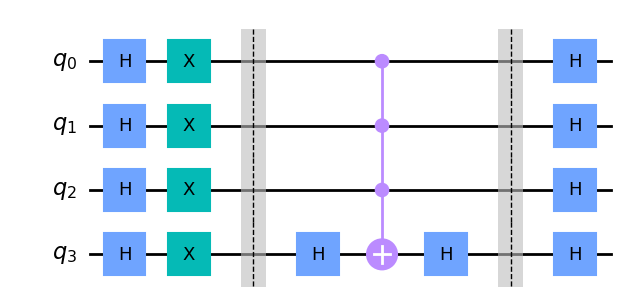

In [35]:
reflection.draw('mpl')

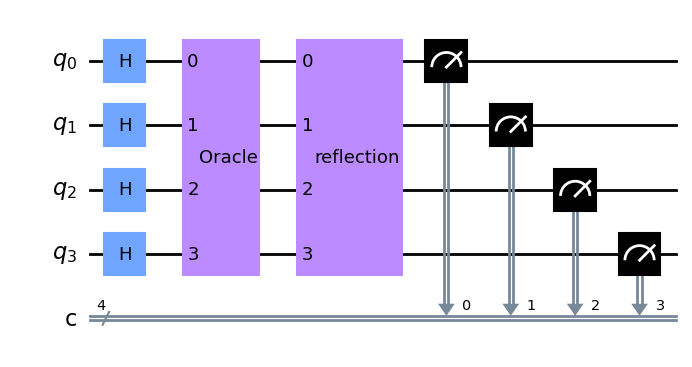

In [36]:
backend=Aer.get_backend('qasm_simulator')
grover_circuit=QuantumCircuit(4,4)
grover_circuit.h([0,1,2,3])

g_orac=QuantumCircuit(4,name='Oracle')
oracle=oracle_4q(g_orac,state)

grover_circuit.append(oracle,[0,1,2,3])
grover_circuit.append(reflection,[0,1,2,3])
grover_circuit.measure([0,1,2,3],[0,1,2,3])
grover_circuit.draw('mpl')

In [37]:
job=execute(grover_circuit,backend,shot=1)
result=job.result()
result.get_counts()

{'1011': 44,
 '0011': 43,
 '0001': 28,
 '0101': 50,
 '1001': 43,
 '0000': 34,
 '0010': 31,
 '0111': 38,
 '1101': 41,
 '1111': 39,
 '1010': 462,
 '1100': 27,
 '0100': 37,
 '0110': 42,
 '1000': 34,
 '1110': 31}

# Max Cut problem

Consider the graph depicted above, which consists of five edges in total. Our goal is to color each vertex either blue or red and determine the number of edges connecting vertices of different colors. 

For instance, in the second example provided, two edges interconnect vertices of distinct colors (blue and red), as illustrated below:

<img src="images/graphcolor2.png" width="25%" align="center">

Conversely, the subsequent example demonstrates a scenario where four edges connect vertices colored with differing hues, representing the maximum for a graph with four vertices:

<img src="images/graphcolor1.png" width="25%" align="center">

By systematically examining such configurations, we discern the varying levels of connectivity between vertices of distinct colors, influencing the overall structure and properties of the graph.

## Definition ##

The problem of finding the maximum number of edges so that their endpoints are colored using different colors is known as the **Max-Cut problem**. Alternatively, the aim is to partition the vertices of the graph into two disjoint sets (which is called a cut) such that the number of edges between the two sets is maximal. The size of the cut is defined as the number of edges between two sets. 

We will focus on the decision version of this problem which is defined as follows:

For a given graph \( G \), the problem is to determine whether there exists a cut of size at least \( k \). 

It turns out that this problem is challenging (in fact it is **NP**-complete). There are \( 2^n \) possible colorings, and so a trivial (brute force) search checks each of these cases in the worst case. Here we show that we can solve this problem faster by using Grover's Search algorithm, approximately by making $\pi\sqrt{2^n}/4 \approx 0.8 \times 1.414^n$ oracle queries..


## A simple case: Bipartite graphs

A graph is bipartite if the set of vertices can be divided into two disjoint sets such that each edge connects a vertex from the first set with a vertex from the second set. An example is presented below:

<img src="images/bipartite.png" width="25%" align="center">

We see that vertex 0 and 1 (or 2 and 3) could form such a set. An example of a graph which is not bipartite is given below.

<img src="images/nonbipartite.png" width="25%" align="center">
We first focus on bipartite graphs before moving on to the general case.

Bipartite graphs have unique properties such that they admit a 2-coloring, a coloring using two colors in which the endpoints of all the edges are colored with different colors. Hence, for bipartite graphs, the solution to the Max-Cut problem is simply the total number of edges.


## Checking bipartiteness

We will check whether a graph is bipartite or not by finding a 2-coloring in which the endpoints of all the edges are colored with different colors.

We will use the following idea to represent coloring of a graph in a quantum circuit. For a graph with $n$ vertices, we will use $n$ qubits. The $i$'th qubit will encode the color of $i$'th vertex as follows: state $\ket{0}$ means the vertex has red color, and state $\ket{1}$ means it has blue color.

## Step 1

Let's implement the idea given above. We have a graph with 4 vertices, and so we have a circuit with 4 qubits. 

Represent the following coloring of the given graph in the quantum circuit.

<img src="images/graphcolor1.png" width="25%" align="center">

In [38]:
from qiskit import QuantumCircuit, Aer, execute

# Define the number of qubits
num_qubits = 4

# Create a quantum circuit
circuit = QuantumCircuit(num_qubits, num_qubits)

# Apply X gate to qubits 1 and 2
circuit.x(1)
circuit.x(2)

# Measure all qubits
circuit.measure(range(num_qubits), range(num_qubits))

# Print the circuit
print(circuit)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, simulator, shots=1).result()
counts = result.get_counts()
print(counts)

# Decode the solution
for bitstring in counts:
    for qubit, value in enumerate(reversed(bitstring)):
        color = 'blue' if value == '1' else 'red'
        print(f"Qubit {qubit} is {color}")
    break  # break after printing the first bitstring for this example
  

          ┌─┐      
q_0: ─────┤M├──────
     ┌───┐└╥┘┌─┐   
q_1: ┤ X ├─╫─┤M├───
     ├───┤ ║ └╥┘┌─┐
q_2: ┤ X ├─╫──╫─┤M├
     └┬─┬┘ ║  ║ └╥┘
q_3: ─┤M├──╫──╫──╫─
      └╥┘  ║  ║  ║ 
c: 4/══╩═══╩══╩══╩═
       3   0  1  2 
{'0110': 1}
Qubit 0 is red
Qubit 1 is blue
Qubit 2 is blue
Qubit 3 is red


## Edge checking 

Next, we will implement a protocol which checks whether an edge has endpoints with different colors. For each edge, we will use a separate qubit, on which we will store a Boolean value: \( \vert 1 \rangle \) if the edge connects vertices with different colors, and \( \vert 0 \rangle \), otherwise.

We use the XOR function \( \oplus \):

We use the XOR function $\oplus$:
$$
x \oplus y = \begin{cases}
1, & x \neq y \\
0, & x = y \\
\end{cases}
$$
where $x$ and $y$ are the colors of vertices and the result is the Boolean value of the edge connecting them.


We can easily implement \( x \oplus y = z \) by using two \( CNOT \) gates as given below.


In [39]:
from qiskit import QuantumCircuit

# Define the number of qubits
num_qubits = 3
circuit = QuantumCircuit(num_qubits)
circuit.cx(0, 2)
circuit.cx(1, 2)
print(circuit.draw())

               
q_0: ──■───────
       │       
q_1: ──┼────■──
     ┌─┴─┐┌─┴─┐
q_2: ┤ X ├┤ X ├
     └───┘└───┘


Here the first two qubits are $x$ and $y$, and $z$ is the third qubit. 

Let’s verify the correctness of the above circuit by checking all possible coloring (inputs).


In [40]:
from qiskit import QuantumCircuit, Aer, execute

# Create a simulator
simulator = Aer.get_backend('qasm_simulator')

for a in range(2):
    for b in range(2):
        print()
        print("First vertex is set to ", a)
        print("Second vertex is set to ", b)
        
        # Create a quantum circuit
        circuit = QuantumCircuit(3, 1)
        
        # encoding coloring
        if a == 1:
            circuit.x(0)
        if b == 1:
            circuit.x(1)

        # edge checking
        circuit.cx(0, 2)
        circuit.cx(1, 2)
        circuit.measure(2, 0)
        
        # Run the circuit
        result = execute(circuit, simulator, shots=1).result()
        counts = result.get_counts(circuit)
        
        print(circuit)
        
        # Decode the result
        output = int(list(counts.keys())[0])  # Extract the measurement result
        
        if output == 1:
            print("Edge connects different colors. Output:", output)
        else:
            print("Edge connects the same colors. Output:", output)



First vertex is set to  0
Second vertex is set to  0
                  
q_0: ──■──────────
       │          
q_1: ──┼────■─────
     ┌─┴─┐┌─┴─┐┌─┐
q_2: ┤ X ├┤ X ├┤M├
     └───┘└───┘└╥┘
c: 1/═══════════╩═
                0 
Edge connects the same colors. Output: 0

First vertex is set to  0
Second vertex is set to  1
                       
q_0: ───────■──────────
     ┌───┐  │          
q_1: ┤ X ├──┼────■─────
     └───┘┌─┴─┐┌─┴─┐┌─┐
q_2: ─────┤ X ├┤ X ├┤M├
          └───┘└───┘└╥┘
c: 1/════════════════╩═
                     0 
Edge connects different colors. Output: 1

First vertex is set to  1
Second vertex is set to  0
     ┌───┐             
q_0: ┤ X ├──■──────────
     └───┘  │          
q_1: ───────┼────■─────
          ┌─┴─┐┌─┴─┐┌─┐
q_2: ─────┤ X ├┤ X ├┤M├
          └───┘└───┘└╥┘
c: 1/════════════════╩═
                     0 
Edge connects different colors. Output: 1

First vertex is set to  1
Second vertex is set to  1
     ┌───┐             
q_0: ┤ X ├──■──────────
     ├──

## Designing an oracle for checking bipartiteness

In Grover's Algorithm, our aim is to find an element marked by the oracle. If we have an oracle detecting any edge connecting two differently colored vertices, then we can use Grover's search to find such colorings (if exists) which "marks" colorings in which the endpoints of all the edges are colored using a different color, then we can use Grover's search to find such colorings (if such a coloring exists). Therefore, we need to define an oracle which will check and "mark" colorings which satisfy this property. 

As we described above, we use separate qubits for each vertex and for each edge. The states of the qubits corresponding to vertices represent the colorings. The input to the oracle are the qubits representing the vertices, and the rest of the qubits are used by the oracle. Before the oracle starts its computation, all qubits representing the edges and the output qubit are in $ \ket{0}$ state, and they should also be in $\ket{0} $ state at the end to be used again for the next oracle call.

We can summarize the computation by the oracle in four steps:

1. By using the XOR operator, we assign the appropriate Boolean value for each edge. 
2. Then, we use an additional output qubit, which is set to 1 if each edge has the value of 1, i.e., each edge connects two vertices with different colors. This part can be implemented by a multi-controlled $NOT$ operator (flip the value of target qubit only if all controlled qubits are in states $\ket{1}$). 

### Step 2

For the given graph below, we will implement the first two steps of the oracle described above. 

The first four qubits are used for vertices.

The next three qubits are used for edges.

The last qubit is used for the output.

Taking into account that the last qubit should be in state $ \ket{1} $ (resp., $\ket{0}$) if the coloring of the vertices is correct (resp., incorrect).

Test your implementation with different colorings.

<img src="images/bipartite.png" width="25%" align="center">

In [41]:
# Define the number of qubits
num_qubits = 8

# Create a quantum circuit
circuit = QuantumCircuit(num_qubits, 1)

# Correct coloring
circuit.x(0)
circuit.x(1)

# Incorrect coloring
# circuit.x(0)

# Check 0-2 edge and store at 4th qubit
circuit.cx(0, 4)
circuit.cx(2, 4)
# Check 0-3 edge and store at 5th qubit
circuit.cx(0, 5)
circuit.cx(3, 5)
# Check 1-3 edge and store at 6th qubit
circuit.cx(1, 6)
circuit.cx(3, 6)

# Check all edge qubits
circuit.mcx([4, 5, 6], 7)

# Measure qubits
circuit.measure(7, 0)

# Execute the circuit
result = execute(circuit, simulator, shots=1).result()
counts = result.get_counts(circuit)

# Decode the result
output = int(list(counts.keys())[0])

print("Measurement output: ", output)
if output == 1:
    print("Correct coloring (graph is bipartite)")
else:
    print("Incorrect coloring")

print(circuit.draw())


Measurement output:  1
Correct coloring (graph is bipartite)
     ┌───┐                                      
q_0: ┤ X ├──■──────────────■────────────────────
     ├───┤  │              │                    
q_1: ┤ X ├──┼────■─────────┼────────────────────
     └───┘  │    │         │                    
q_2: ───────┼────┼────■────┼────────────────────
            │    │    │    │                    
q_3: ───────┼────┼────┼────┼────■────■──────────
          ┌─┴─┐  │  ┌─┴─┐  │    │    │          
q_4: ─────┤ X ├──┼──┤ X ├──┼────┼────┼────■─────
          └───┘  │  └───┘┌─┴─┐┌─┴─┐  │    │     
q_5: ────────────┼───────┤ X ├┤ X ├──┼────■─────
               ┌─┴─┐     └───┘└───┘┌─┴─┐  │     
q_6: ──────────┤ X ├───────────────┤ X ├──■─────
               └───┘               └───┘┌─┴─┐┌─┐
q_7: ───────────────────────────────────┤ X ├┤M├
                                        └───┘└╥┘
c: 1/═════════════════════════════════════════╩═
                                              0 


Let's continue with the remaining steps of the oracle.

3. The oracle flips the sign of the amplitude of the states which lead to $ \ket{1} $ as the output. This can be easily done by applying a $Z$ gate: when in state $\ket{1}$, the sign is flipped, and it does not change, otherwise. 
4. We reverse the whole computation done in the first 2 steps so that the oracle leaves all the qubits used in the computation in state $\ket{0}$. This can be done by reversing every quantum operator before the $Z$ gate. (In Cirq, the method “inverse” can be used.) In this way, the only effect of the oracle is flipping the amplitude of the sign of the qubits representing the correct coloring.

Now, our oracle is ready to be used as a part of Grover’s search algorithm. 

In the following code, we apply the oracle once and observe its effect. We start with an equal superposition of all possible coloring for the vertices (the first qubits).

In [42]:
# Define the number of qubits
num_qubits = 8

# Create the quantum circuit
qc = QuantumCircuit(num_qubits)

# Apply Hadamard gate to qubits 0 to 3
for qubit in range(4):
    qc.h(qubit)

# Define the oracle operation
def oracle(qc):
    # check 0-2 edge and store at 4th qubit
    qc.cx(0, 4)
    qc.cx(2, 4)
    # check 0-3 edge and store at 5th qubit
    qc.cx(0, 5)
    qc.cx(3, 5)
    # check 1-3 edge and store at 6th qubit
    qc.cx(1, 6)
    qc.cx(3, 6)

    # check all edge qubits
    qc.mcx([4, 5, 6], 7)

# Apply the oracle operation
oracle(qc)
qc.z(7)
oracle(qc)

import numpy as np

# Simulate the circuit
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
quantum_state = result.get_statevector()

# Convert the Statevector object to a NumPy array
quantum_state_array = np.asarray(quantum_state)

# Print the non-zero amplitudes and corresponding basis states
for i in range(len(quantum_state_array)):
    if abs(quantum_state_array[i]) > 1e-10:  # Consider only non-zero amplitudes
        print(format(i, 'b').zfill(num_qubits), quantum_state_array[i])


00000000 (0.25000000000000006+0j)
00000001 (0.25000000000000006+0j)
00000010 (0.25000000000000006+0j)
00000100 (0.25000000000000006+0j)
00000101 (0.25+0j)
00000110 (0.25+0j)
00000111 (0.24999999999999994+0j)
00001000 (0.25000000000000006+0j)
00001001 (0.25+0j)
00001010 (0.25+0j)
00001011 (0.24999999999999994+0j)
00001101 (0.24999999999999994+0j)
00001110 (0.24999999999999994+0j)
00001111 (0.24999999999999992+0j)
10000011 (-0.25+0j)
10001100 (-0.25+0j)


Note several important things here. The last four qubits are set to zero: these are edge checking and output qubit, and since they are set to zero, we can reuse them in further computation.

As observed from the outcome, only the sign of the following states are flipped:
$$
	\ket{0011}\ket{0000} \mbox{ and } \ket{1100}\ket{0000}.
$$

In the first case, the vertices 0 and 1 are colored blue and the vertices 2 and 3 are colored red. In the second case, the first pair is colored red and the second one colored blue.


### Problem 1


For the given graphs below, we will iterate Grover’s search algorithm 2 steps to find the correct colorings. (There are indeed $k=2$ possible colorings, and so the oracle should be applied $\frac{\pi}{4}\sqrt{\frac{2^4}{k}}\approx 2$ times.) 

We will use nine qubits: 4 for vertices, 4 for edges, and 1 for the output qubit.

The diffusion operator is provided below.

We will observe which outcomes have the higher frequencies.


<img src="images/completebipartite.png" width="25%" align="center">

In [43]:
# Define the edge check operation
def edge_check(qc, a, b, c):
    qc.cx(a, c)
    qc.cx(b, c)

# Define the oracle operation
def oracle(qc, qubits):
    # check 0-2 edge and store at 4th qubit
    edge_check(qc, qubits[0], qubits[2], qubits[4])
    # check 0-3 edge and store at 5th qubit
    edge_check(qc, qubits[0], qubits[3], qubits[5])
    # check 1-2 edge and store at 6th qubit
    edge_check(qc, qubits[1], qubits[2], qubits[6])
    # check 1-3 edge and store at 7th qubit
    edge_check(qc, qubits[1], qubits[3], qubits[7])

    # check all edge qubits
    qc.mcx(list(qubits[4:8]), qubits[8])


# Define the oracle computation
def oracle_computation(qc, qubits):
    oracle(qc, qubits)
    qc.z(qubits[8])
    oracle(qc, qubits)

# Define the Grover diffusion operation
def grover_diffusion(qc, qubits):
    qc.h(qubits)
    qc.x(qubits)
    qc.h(qubits[3])
    qc.mcx(list(qubits[0:3]), qubits[3])
    qc.h(qubits[3])
    qc.x(qubits)
    qc.h(qubits)

# Define the quantum circuit
qc = QuantumCircuit(9, 4)
# Apply Hadamard gate to qubits 0 to 3
for qubit in range(4):
    qc.h(qubit)

# Apply oracle and diffusion operations
for _ in range(2):
    oracle_computation(qc, range(9))
    grover_diffusion(qc, range(9))

# Measure qubits 0 to 3
qc.measure(qc.qubits[0:4], qc.clbits[0:4])


# Simulate the quantum circuit
backend = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, backend)
qobj = assemble(compiled_circuit)
shots = 1000  # Set the number of shots or repetitions
result = backend.run(compiled_circuit, shots=shots).result()
counts = result.get_counts()
print(counts)


{'0010': 39, '0111': 40, '1110': 39, '0110': 38, '1011': 45, '0011': 228, '0001': 41, '1100': 226, '0100': 36, '0000': 33, '0101': 38, '1101': 35, '1111': 32, '1000': 38, '1010': 53, '1001': 39}


* Note that the states '0011' and '1100' are the most commonly observed states.

### Problem 2

We will repeat Problem 1 for the following graph.


<img src="images/nonbipartite.png" width="25%" align="center">

In [44]:

num_qubits = 9

# Create a QuantumCircuit
qc = QuantumCircuit(num_qubits, num_qubits)

# Define the range of qubits
qq = range(num_qubits)

# Define edge_check function
def edge_check(a, b, c):
    qc.cx(qq[a], qq[c])
    qc.cx(qq[b], qq[c])

# Define oracle_computation function
def oracle_computation():
    # check 0-1 edge and store at 4th qubit
    edge_check(0, 1, 4)
    # check 0-2 edge and store at 5th qubit
    edge_check(0, 2, 5)
    # check 0-3 edge and store at 6th qubit
    edge_check(0, 3, 6)
    # check 1-3 edge and store at 7th qubit
    edge_check(1, 3, 7)

    # check all edge qubits
    qc.x(qq[8]).c_if(qq[4], 1)
    qc.x(qq[8]).c_if(qq[5], 1)
    qc.x(qq[8]).c_if(qq[6], 1)
    qc.x(qq[8]).c_if(qq[7], 1)

# Define oracle function
def oracle():
    oracle_computation()
    qc.z(qq[8])
    oracle_computation()

# Define grover_diffusion function
def grover_diffusion():
    qc.h(qq[0:4])
    qc.x(qq[0:4])
    qc.h(qq[3])
    qc.mcx(list(qq[0:3]), qq[3])  # Convert range to list
    qc.h(qq[3])
    qc.x(qq[0:4])


# Apply operations to the circuit
qc.h(qq[0:4])
for _ in range(2):
    oracle()
    grover_diffusion()

# Measure qubits
qc.measure(qq[0:4], qq[0:4])

# Execute the circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=10000).result()
counts = result.get_counts(qc)
print(counts)


{'000000111': 628, '000000101': 601, '000001000': 614, '000001101': 640, '000001111': 617, '000000010': 590, '000000000': 625, '000000110': 660, '000000011': 614, '000000001': 647, '000001001': 641, '000001011': 640, '000000100': 613, '000001100': 598, '000001110': 629, '000001010': 643}


* We observe that all strings have almost the same occurence. The reason is that there is no correct coloring.

## Conclussion

In conclusion, we have implemented Grover's search algorithm to determine the 2-coloring of a graph, which helps us ascertain whether the graph is bipartite. When the graph is bipartite, solving the Max-Cut problem for it becomes straightforward.

It's important to note that our algorithm requires  $O(\sqrt{2^n})$ steps, while the problem can be solved classically in $O(n^2)$ steps. However, we view this application as a pedagogical example of designing an oracle and applying Grover’s search algorithm to a well-known graph problem.

* Reference - Qworld (QNickel Workshop) [https://qworld.net/qeducation/]
Remark: Max-cut problem was done in Qworld's QNickel workshop using cirq. We have implemented it using Qiskit in this jupyter notebook.